In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv(r"C:\Users\User\Downloads\Mall_Customers.csv")

In [61]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Analysis

In [63]:
data.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


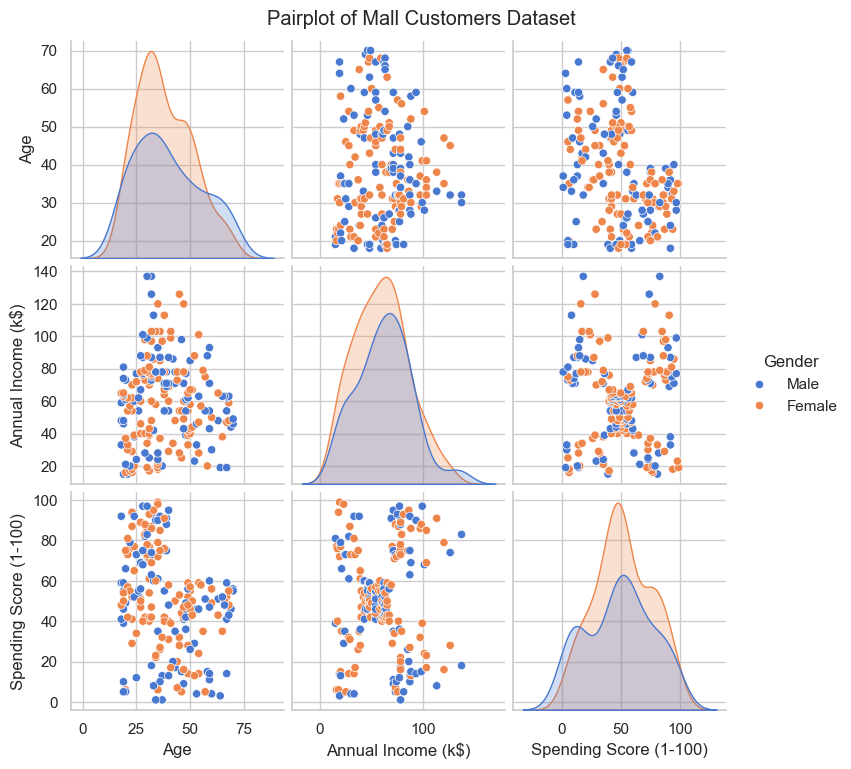

In [64]:
# Select relevant columns
Y = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Set the style and palette
sns.set(style="whitegrid", palette="muted")

# Create the pairplot
pairplot = sns.pairplot(Y, hue='Gender', diag_kind='kde')

# Add titles and adjust layout
pairplot.fig.suptitle('Pairplot of Mall Customers Dataset', y=1.02)

# Show the plot
plt.show()

## Data Preprocessing

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
X = data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
X.head()

0    0
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64

In [68]:
df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [69]:
def find_outliers_iqr(data, column):
    """
    Identifies outliers in a column using the IQR method.
    Args:
    - data: Pandas DataFrame
    - column: Column name to check for outliers

    Returns:
    - DataFrame rows containing outliers in the specified column
    """
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers for each column
for column in df.columns:
    print(f"Outliers in {column}:")
    outliers = find_outliers_iqr(df, column)
    print(outliers if not outliers.empty else "No outliers found.")
    print()

Outliers in Age:
No outliers found.

Outliers in Annual Income (k$):
     Age  Annual Income (k$)  Spending Score (1-100)
198   32                 137                      18
199   30                 137                      83

Outliers in Spending Score (1-100):
No outliers found.



In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [71]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


## K-Means Algorithm

In [73]:
# Import necessary modules
import os  # Provides access to environment variables and system-level operations
from threadpoolctl import threadpool_limits  # Controls the number of threads used by thread-pooling libraries

In [74]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [75]:
# Limit the number of threads to avoid memory leaks
threadpool_limits(limits=1)

In [76]:
# Initialize the list for storing within-cluster sum of squares (WCSS)
wcss = []

# Iterate over the range of cluster numbers
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42) # Ensure reproducibility: Ensures the same results every time you run the algorithm.
    kmeans.fit(scaled_features) # Fit the model to the dataset
    wcss.append(kmeans.inertia_) # Append the inertia to WCSS

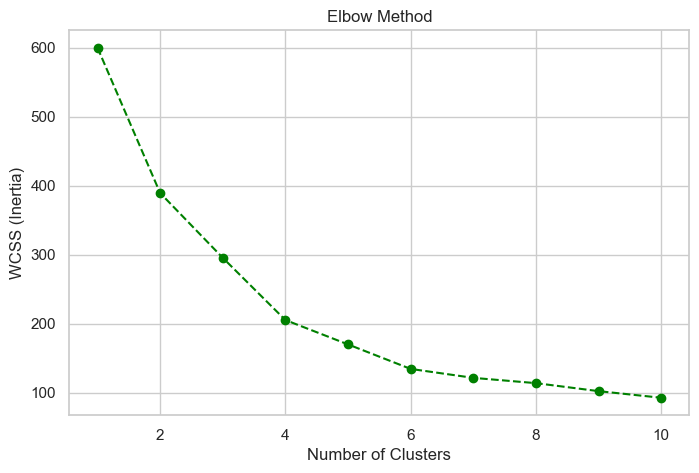

In [77]:
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='green')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [78]:
# Apply K-Means with K-Means++ initialization (assume k=6 from the Elbow Method)
kmeans = KMeans(n_clusters=6, 
                init='k-means++', # Use K-Means++ initialization
                random_state=42)

clusterss = kmeans.fit_predict(scaled_features) # This applies K-Means and predicts cluster labels. 

# Add cluster labels to the original dataset
data['Cluster'] = clusterss
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,5
3,4,1,23,16,77,2
4,5,1,31,17,40,5


In [79]:
# Centroids
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to the original scale
centroids_original = scaler.inverse_transform(centroids)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
 [[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]


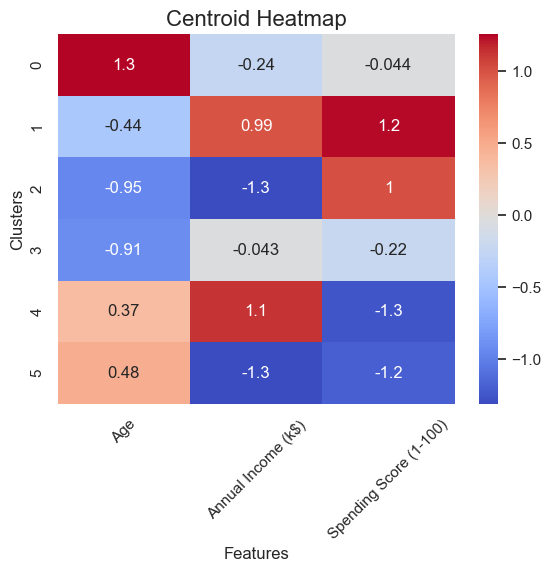

In [80]:
# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
sns.heatmap(centroids_df, annot=True, cmap='coolwarm', cbar=True)
# Plot the heatmap
plt.title('Centroid Heatmap', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=45)
plt.show()

In [81]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(scaled_features, clusterss)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.43


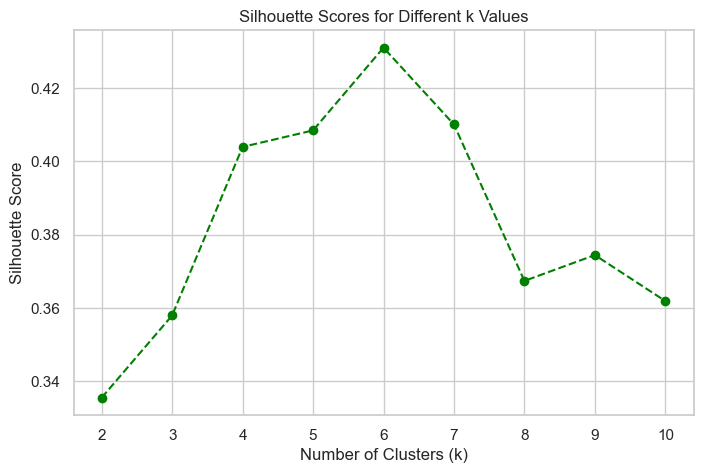

In [82]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

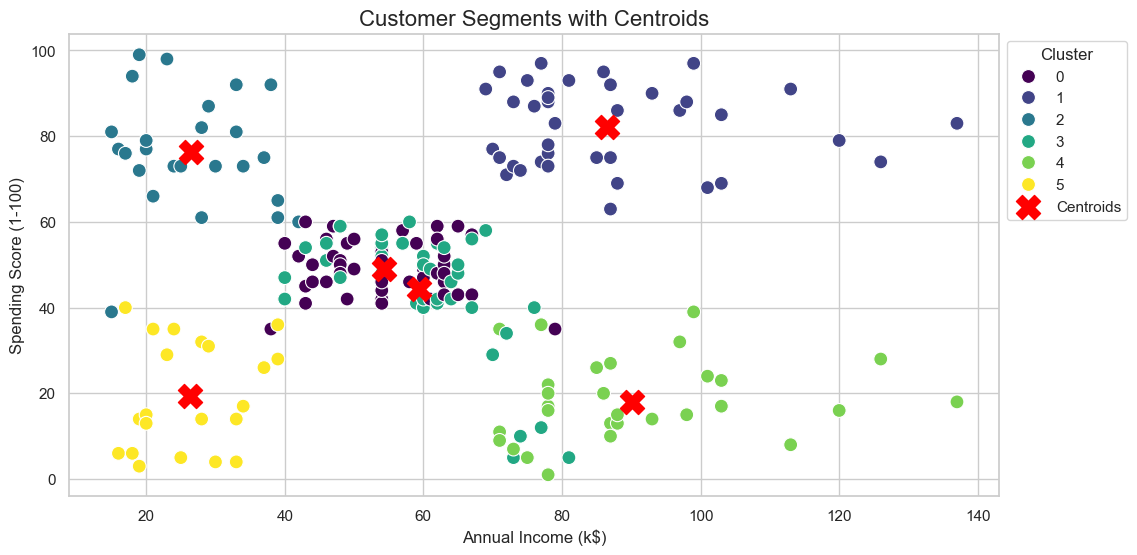

In [83]:
# Visualize the clusters with centroids
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids', fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [84]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],clusterss))
print(classification_report(data['Cluster'],clusterss))

[[45  0  0  0  0  0]
 [ 0 39  0  0  0  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 40  0  0]
 [ 0  0  0  0 30  0]
 [ 0  0  0  0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [85]:
# Create a dictionary to store cluster information
cluster_info = {
    'Cluster': [],
    'Number of Customers': [],
    'Customer IDs': []
}

# Iterate through each cluster and collect information
for cluster in sorted(data['Cluster'].unique()):
    cust = data[data['Cluster'] == cluster]
    cluster_info['Cluster'].append(cluster)
    cluster_info['Number of Customers'].append(len(cust))
    cluster_info['Customer IDs'].append(', '.join(map(str, cust['CustomerID'].values)))

# Convert the dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_info)

# Adjust display settings to ensure all Customer IDs are visible
pd.set_option('display.max_colwidth', None)

# Display the table
cluster_df

,Cluster,Number of Customers,Customer IDs
0,0,45,"41, 47, 51, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 67, 68, 71, 72, 73, 74, 75, 77, 80, 81, 83, 84, 86, 87, 90, 91, 93, 97, 99, 102, 103, 105, 107, 108, 109, 110, 111, 117, 118, 119, 120, 161"
1,1,39,"124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200"
2,2,25,"1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 52"
3,3,40,"48, 49, 50, 53, 59, 62, 66, 69, 70, 76, 78, 79, 82, 85, 88, 89, 92, 94, 95, 96, 98, 100, 101, 104, 106, 112, 113, 114, 115, 116, 121, 122, 123, 125, 133, 135, 139, 143, 145, 163"
4,4,30,"127, 129, 131, 137, 141, 147, 149, 151, 153, 155, 157, 159, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199"
5,5,21,"3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 43, 45"


In [86]:
# Save dataset with clusters
data.to_csv("clustered_mall_customers.csv", index=False)